<a href="https://colab.research.google.com/github/shramkoartem/tensorflow_utils/blob/master/overfit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow import keras

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [0]:
NUM_WORDS = 10000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # set specific indices of results[i] to 1s
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

17465344/17464789 [==============================] - 0s 0us/step


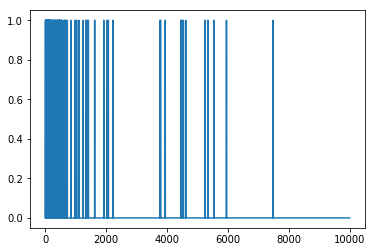

In [0]:
plt.plot(train_data[0])


In [0]:
baseline_model = keras.models.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

baseline_model.compile(optimizer="adam",
                      loss = "binary_crossentropy",
                      metrics=["accuracy", "binary_crossentropy"])

baseline_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [0]:
baseline_history = baseline_model.fit(train_data,
                                     train_labels,
                                     epochs=20,
                                     batch_size=512,
                                     validation_data=(test_data, test_labels),
                                      verbose =2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5268 - acc: 0.7611 - binary_crossentropy: 0.5268 - val_loss: 0.3683 - val_acc: 0.8719 - val_binary_crossentropy: 0.3683
Epoch 2/20
25000/25000 - 3s - loss: 0.2715 - acc: 0.9096 - binary_crossentropy: 0.2715 - val_loss: 0.2888 - val_acc: 0.8880 - val_binary_crossentropy: 0.2888
Epoch 3/20
25000/25000 - 3s - loss: 0.1934 - acc: 0.9336 - binary_crossentropy: 0.1934 - val_loss: 0.2902 - val_acc: 0.8835 - val_binary_crossentropy: 0.2902
Epoch 4/20
25000/25000 - 3s - loss: 0.1548 - acc: 0.9463 - binary_crossentropy: 0.1548 - val_loss: 0.3165 - val_acc: 0.8748 - val_binary_crossentropy: 0.3165
Epoch 5/20
25000/25000 - 3s - loss: 0.1255 - acc: 0.9586 - binary_crossentropy: 0.1255 - val_loss: 0.3294 - val_acc: 0.8760 - val_binary_crossentropy: 0.3294
Epoch 6/20
25000/25000 - 3s - loss: 0.1003 - acc: 0.9702 - binary_crossentropy: 0.1003 - val_loss: 0.3563 - val_acc: 0.8724 - val_binary_crossentropy: 0.3563
Ep

In [0]:
smaller_model = keras.models.Sequential([
    keras.layers.Dense(4, activation="relu", input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

smaller_model.compile(optimizer="adam",
                     loss="binary_crossentropy",
                     metrics=["accuracy","binary_crossentropy"])

smaller_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


In [0]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 3s - loss: 0.6362 - acc: 0.6674 - binary_crossentropy: 0.6362 - val_loss: 0.5783 - val_acc: 0.7274 - val_binary_crossentropy: 0.5783
Epoch 2/20
25000/25000 - 3s - loss: 0.5276 - acc: 0.8124 - binary_crossentropy: 0.5276 - val_loss: 0.5150 - val_acc: 0.8003 - val_binary_crossentropy: 0.5150
Epoch 3/20
25000/25000 - 3s - loss: 0.4699 - acc: 0.8695 - binary_crossentropy: 0.4699 - val_loss: 0.4852 - val_acc: 0.8186 - val_binary_crossentropy: 0.4852
Epoch 4/20
25000/25000 - 3s - loss: 0.4323 - acc: 0.8976 - binary_crossentropy: 0.4323 - val_loss: 0.4614 - val_acc: 0.8493 - val_binary_crossentropy: 0.4614
Epoch 5/20
25000/25000 - 3s - loss: 0.4031 - acc: 0.9155 - binary_crossentropy: 0.4031 - val_loss: 0.4476 - val_acc: 0.8548 - val_binary_crossentropy: 0.4476
Epoch 6/20
25000/25000 - 3s - loss: 0.3795 - acc: 0.9284 - binary_crossentropy: 0.3795 - val_loss: 0.4326 - val_acc: 0.8687 - val_binary_crossentropy: 0.4326
Ep

In [0]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation="relu", input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

bigger_model.compile(optimizer="adam",
                    loss="binary_crossentropy",
                    metrics=["accuracy", "binary_crossentropy"])

bigger_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_10 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


In [0]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 18s - loss: 2.2352e-05 - acc: 1.0000 - binary_crossentropy: 2.2352e-05 - val_loss: 0.9227 - val_acc: 0.8708 - val_binary_crossentropy: 0.9227
Epoch 2/20
25000/25000 - 18s - loss: 1.9662e-05 - acc: 1.0000 - binary_crossentropy: 1.9662e-05 - val_loss: 0.9325 - val_acc: 0.8708 - val_binary_crossentropy: 0.9325
Epoch 3/20
25000/25000 - 18s - loss: 1.7439e-05 - acc: 1.0000 - binary_crossentropy: 1.7439e-05 - val_loss: 0.9417 - val_acc: 0.8708 - val_binary_crossentropy: 0.9417
Epoch 4/20
25000/25000 - 18s - loss: 1.5559e-05 - acc: 1.0000 - binary_crossentropy: 1.5559e-05 - val_loss: 0.9503 - val_acc: 0.8708 - val_binary_crossentropy: 0.9503
Epoch 5/20
25000/25000 - 18s - loss: 1.3963e-05 - acc: 1.0000 - binary_crossentropy: 1.3963e-05 - val_loss: 0.9587 - val_acc: 0.8708 - val_binary_crossentropy: 0.9587
Epoch 6/20
25000/25000 - 18s - loss: 1.2577e-05 - acc: 1.0000 - binary_crossentropy: 1.2577e-05 - val_loss: 0.9670 

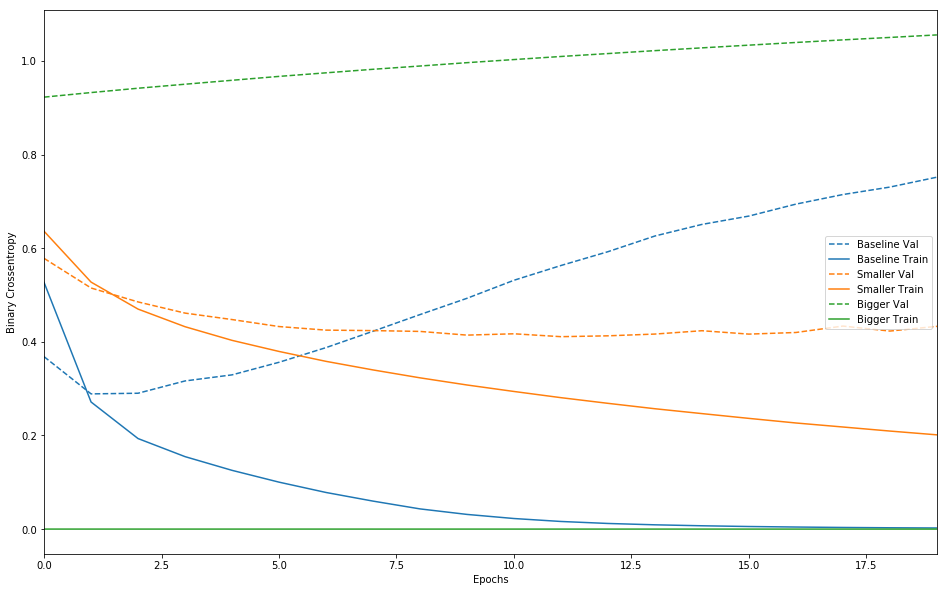

In [0]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [0]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation="relu", input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                      activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

l2_model.compile(optimizer="adam",
                loss="binary_crossentropy",
                metrics=["accuracy","binary_crossentropy"])

l2_model_history = l2_model.fit(train_data, train_labels,
                               epochs=20,
                               batch_size=512,
                               validation_data=(test_data, test_labels),
                               verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.5293 - acc: 0.8057 - binary_crossentropy: 0.4912 - val_loss: 0.3905 - val_acc: 0.8749 - val_binary_crossentropy: 0.3510
Epoch 2/20
25000/25000 - 3s - loss: 0.3100 - acc: 0.9077 - binary_crossentropy: 0.2662 - val_loss: 0.3340 - val_acc: 0.8877 - val_binary_crossentropy: 0.2869
Epoch 3/20
25000/25000 - 3s - loss: 0.2562 - acc: 0.9272 - binary_crossentropy: 0.2066 - val_loss: 0.3350 - val_acc: 0.8861 - val_binary_crossentropy: 0.2834
Epoch 4/20
25000/25000 - 3s - loss: 0.2319 - acc: 0.9378 - binary_crossentropy: 0.1787 - val_loss: 0.3470 - val_acc: 0.8832 - val_binary_crossentropy: 0.2925
Epoch 5/20
25000/25000 - 3s - loss: 0.2166 - acc: 0.9444 - binary_crossentropy: 0.1608 - val_loss: 0.3574 - val_acc: 0.8802 - val_binary_crossentropy: 0.3008
Epoch 6/20
25000/25000 - 3s - loss: 0.2050 - acc: 0.9508 - binary_crossentropy: 0.1474 - val_loss: 0.3695 - val_acc: 0.8769 - val_binary_crossentropy: 0.3115
Ep

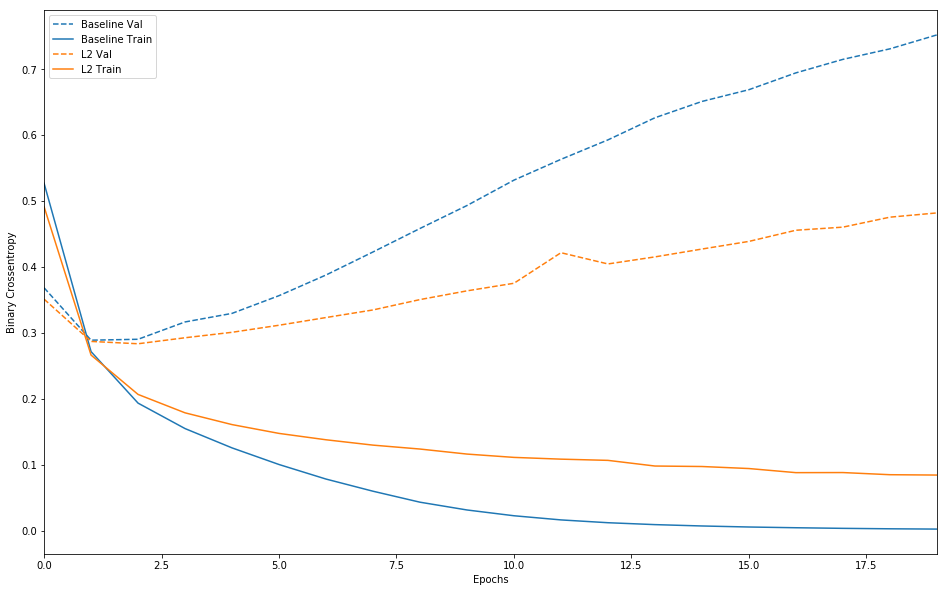

In [0]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [0]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Train on 25000 samples, validate on 25000 samples
Epoch 1/20
25000/25000 - 4s - loss: 0.6034 - acc: 0.6774 - binary_crossentropy: 0.6034 - val_loss: 0.4674 - val_acc: 0.8558 - val_binary_crossentropy: 0.4674
Epoch 2/20
25000/25000 - 3s - loss: 0.4323 - acc: 0.8270 - binary_crossentropy: 0.4323 - val_loss: 0.3337 - val_acc: 0.8817 - val_binary_crossentropy: 0.3337
Epoch 3/20
25000/25000 - 3s - loss: 0.3421 - acc: 0.8778 - binary_crossentropy: 0.3421 - val_loss: 0.2919 - val_acc: 0.8884 - val_binary_crossentropy: 0.2919
Epoch 4/20
25000/25000 - 3s - loss: 0.2830 - acc: 0.9024 - binary_crossentropy: 0.2830 - val_loss: 0.2791 - val_acc: 0.8878 - val_binary_crossentropy: 0.2791
Epoch 5/20
25000/25000 - 3s - loss: 0.2435 - acc: 0.9168 - binary_crossentropy: 0.2435 - val_loss: 0.2806 - val_acc: 0.8865 - val_binary_crossentropy: 0.2806
Epoch 6/20
25000/25000 - 3s - loss: 0.2130 - acc: 0.9294 - binary_crossentropy: 0.2130 - val_loss: 0.2897 - val_acc: 0.8856 - val_binary_crossentropy: 0.2897
Ep

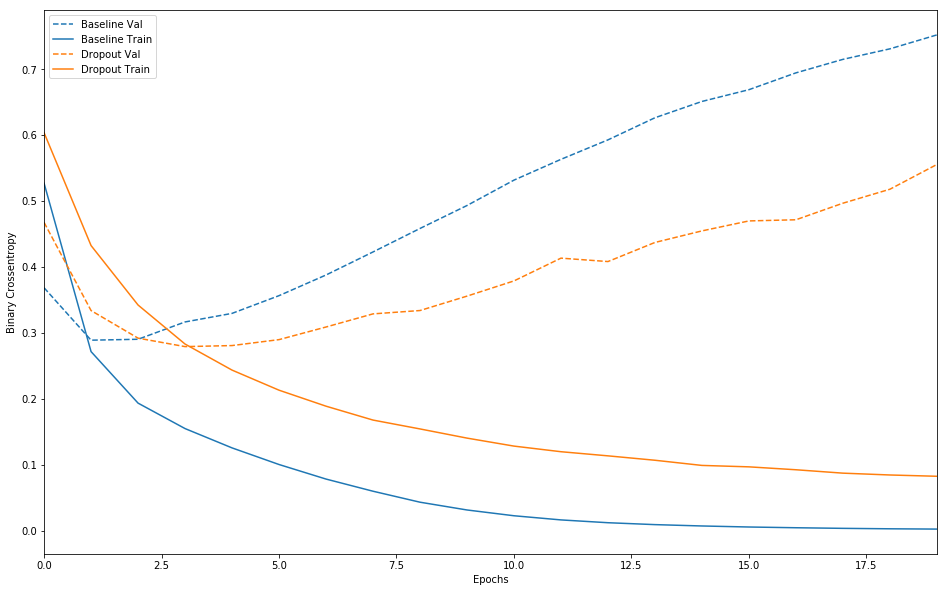

In [0]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])